In [1]:
import numpy as np
from PIL import Image
import glob

In [2]:
folder = glob.glob("E:/Siva/SSSIHL/MSc Data Science/1st Sem/101 Lab/faces 64-64/*.jpg")
folder = [file.replace('\\', '/') for file in folder]

In [3]:
matrix  = []
m_x = 0
m_y = 0

for file in folder:
    image = Image.open(file)
    image = image.convert('L')
    image_vector = np.array(image)
    matrix.append(np.array([image_vector.T.ravel()]).T)

In [4]:
matrix[0].shape

(4096, 1)

In [5]:
f_matrix = np.column_stack(matrix)
rows, columns = f_matrix.shape

mean_array = np.zeros_like(matrix[0])
for pic in matrix:
    mean_array += pic

mean_array = mean_array/columns
mean_array_list = [mean_array for i in range(columns)]

mean_mat = np.column_stack(mean_array_list)

In [6]:
R = ((f_matrix - mean_mat) @ (f_matrix - mean_mat).T) / (columns-1)
eigenvalues, eigenvectors = np.linalg.eig(R)
sorted_eigenvalues = eigenvalues.argsort()
eigenvectors.shape

(4096, 4096)

In [7]:
p = 100

vectorList = []

for i in range(p):
    vector = eigenvectors[:, sorted_eigenvalues[i]]
    vectorList.append(vector)

In [8]:
V = np.column_stack(vectorList)

In [9]:
sub_matrix = f_matrix - mean_mat

In [10]:
weight_list = []
for i in range(sub_matrix.shape[1]):
    weight = V.T @ sub_matrix[:,i]
    weight_list.append(weight)

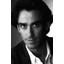

In [11]:
image = Image.open('E:/Siva/SSSIHL/MSc Data Science/1st Sem/101 Lab/faces 64-64/pic00043.jpg')
image = image.convert('L')
image_vector = np.array(image)
image_vector = np.array([image_vector.T.ravel()]).T
image

In [12]:
new_weight = V.T @ image_vector

In [13]:
distance_list = []

for weight in weight_list:
    distance = np.linalg.norm(new_weight - weight)
    distance_list.append(distance)

In [14]:
distance_vector = np.array(distance_list)
top = distance_vector.argsort()[:10]

In [15]:
display_list = []
for t in top:
    image = Image.open(folder[t])
    image = image.convert('L')
    display_list.append(image)

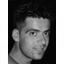

In [16]:
display_list[0]